# Jobsheet 02 - Regression

Isikan identitas berikut
NIM: 2241727038
Nama: Teo Wisnu Widiantoro
Kelas: 4-J

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [1]:
# import package
import numpy as np
import pandas as pd

In [2]:
# baca data
data = pd.read_csv('nilai_kemanusiaan.csv')
data.head()

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
0,0,3322014,332,3532154,353,26,778,486,679,594,643,686,559,392,676
1,1,3212057,321,3322022,332,35,579,631,710,700,810,656,638,535,686
2,2,3722057,372,1912042,191,44,600,481,314,432,522,494,461,467,574
3,3,3212081,321,3212301,321,55,559,563,646,638,591,538,585,647,589
4,4,3812106,381,3852034,385,171,838,734,654,613,690,315,628,660,674


In [3]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61202 entries, 0 to 61201
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Unnamed: 0            61202 non-null  int64
 1   id_first_major        61202 non-null  int64
 2   id_first_university   61202 non-null  int64
 3   id_second_major       61202 non-null  int64
 4   id_second_university  61202 non-null  int64
 5   id_user               61202 non-null  int64
 6   score_eko             61202 non-null  int64
 7   score_geo             61202 non-null  int64
 8   score_kmb             61202 non-null  int64
 9   score_kpu             61202 non-null  int64
 10  score_kua             61202 non-null  int64
 11  score_mat             61202 non-null  int64
 12  score_ppu             61202 non-null  int64
 13  score_sej             61202 non-null  int64
 14  score_sos             61202 non-null  int64
dtypes: int64(15)
memory usage: 7.0 MB


,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
count,61202.000000,6.120200e+04,61202.000000,6.120200e+04,61202.000000,61202.000000,61202.000000,61202.000000,61202.000000,61202.000000,61202.000000,61202.000000,61202.000000,61202.000000,61202.000000
mean,30600.500000,3.494004e+06,349.239110,3.480706e+06,347.903287,184678.938286,547.778259,546.765629,552.029084,539.690647,520.860103,531.077873,530.598363,540.408974,542.470818
std,17667.639924,9.841163e+05,98.362137,1.062845e+06,106.223687,93047.899031,100.337350,94.413754,103.937621,84.776502,96.017500,120.147282,87.541499,99.378633,101.515457
min,0.000000,2.530000e+02,9.000000,2.530000e+02,9.000000,26.000000,0.000000,252.000000,150.000000,218.000000,266.000000,219.000000,204.000000,222.000000,238.000000
25%,15300.250000,3.242025e+06,324.000000,3.242056e+06,324.000000,105631.250000,479.000000,482.000000,482.000000,482.000000,453.000000,452.000000,472.000000,471.000000,474.000000
50%,30600.500000,3.532243e+06,353.000000,3.532332e+06,353.000000,198189.500000,543.000000,547.000000,550.000000,538.000000,513.000000,517.000000,532.000000,540.000000,536.000000
75%,45900.750000,3.712175e+06,371.000000,3.722034e+06,372.000000,263297.250000,612.000000,612.000000,621.000000,595.000000,580.000000,596.000000,590.000000,609.000000,605.000000
max,61201.000000,9.212073e+06,921.000000,9.212073e+06,921.000000,328373.000000,1017.000000,969.000000,908.000000,858.000000,921.000000,1117.000000,843.000000,939.000000,975.000000


### Visualisasi Data

In [4]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

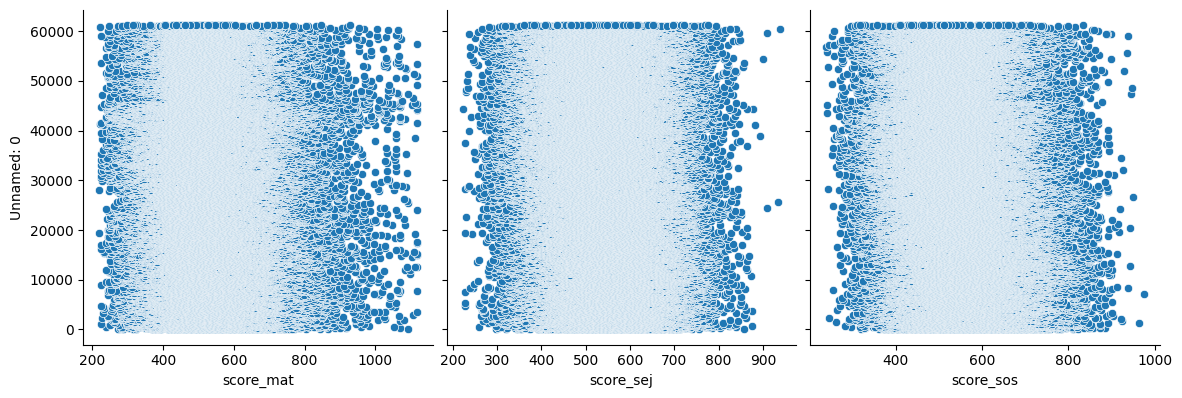

In [5]:
# operasi visualisasi
sns.pairplot(data, x_vars=['score_mat', 'score_sej','score_sos'], 
             y_vars='Unnamed: 0', height=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

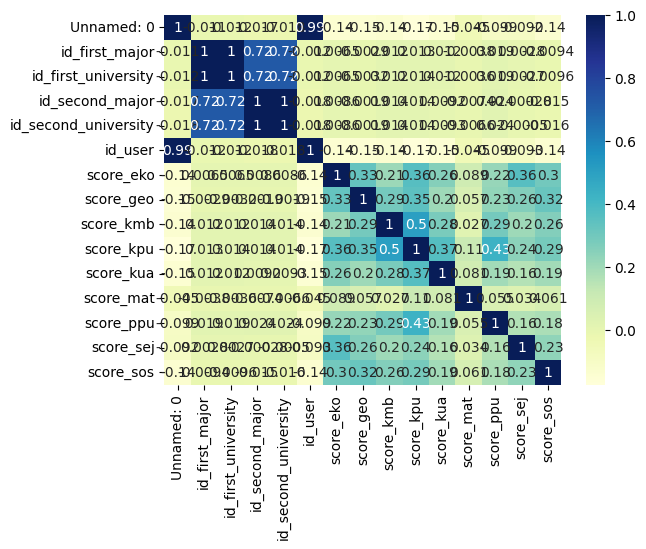

In [6]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Regresi Linier

In [7]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['score_sos']
y = data['Unnamed: 0']

In [8]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [9]:
# hasil training dtaset
X_train
y_train

42918    42918
12629    12629
60110    60110
7439      7439
34979    34979
         ...  
12119    12119
57191    57191
14147    14147
56088    56088
38408    38408
Name: Unnamed: 0, Length: 42841, dtype: int64

In [10]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [11]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const        43365.655906
score_sos      -23.542153
dtype: float64

In [12]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unnamed: 0   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     801.0
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.30e-174
Time:                        14:39:13   Log-Likelihood:            -4.7926e+05
No. Observations:               42841   AIC:                         9.585e+05
Df Residuals:                   42839   BIC:                         9.586e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.337e+04    459.321     94.412      0.000    4.25e+04    4.43e+04
score_sos    -23.5422      0.832    -28.303      0.000     -25.172     -21.912
==============================================================================
Omnibus:                    23507.552   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2327.015
Skew:                           0.009   Prob(JB):                         0.00
Kurtosis:                       1.858   Cond. No.                     3.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

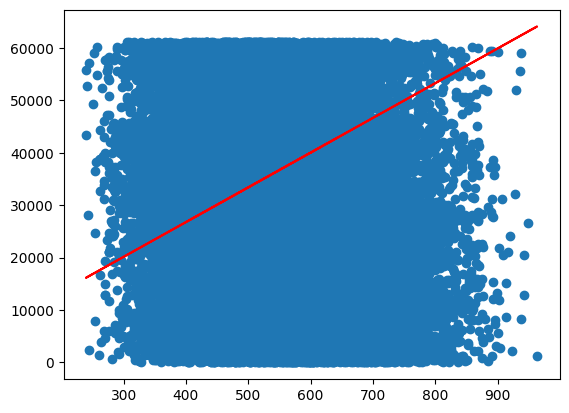

In [13]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [14]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

<Figure size 640x480 with 0 Axes>

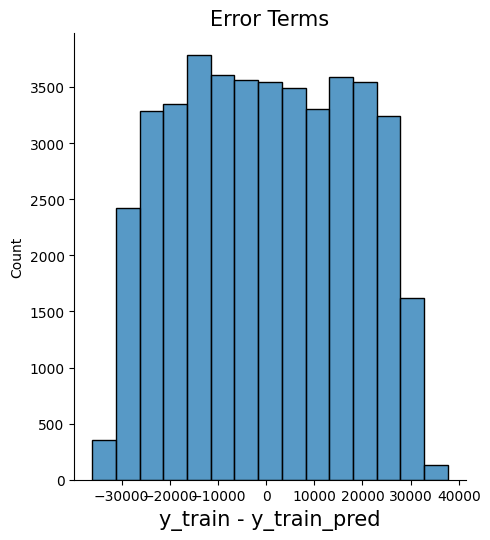

In [15]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.displot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

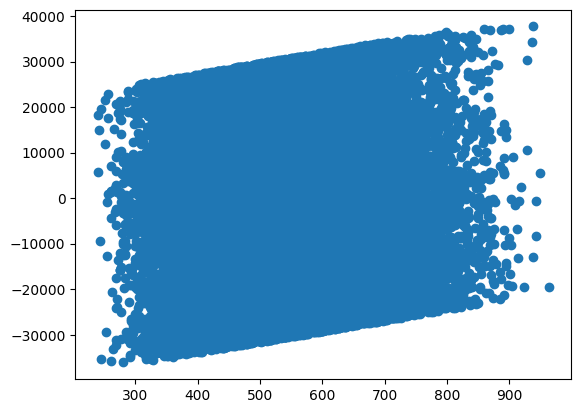

In [16]:
plt.scatter(X_train,res)
plt.show()

In [17]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

31486    26015.088985
20005    29522.869814
16371    31476.868531
53816    29687.664887
17980    30346.845177
dtype: float64

In [18]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.019980032334556586

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.273 sedangkan dari data testing adalah 0.200. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

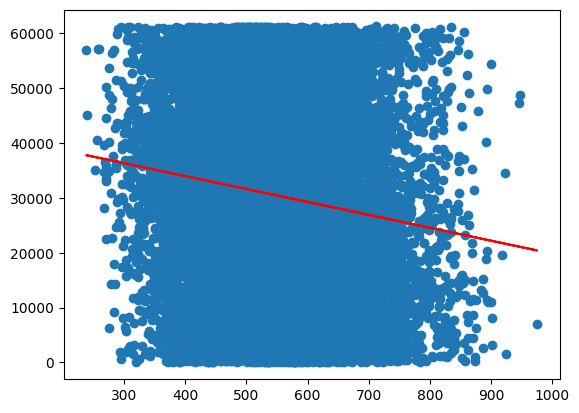

In [19]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()